<a href="https://colab.research.google.com/github/parkgunha/Chagawa/blob/main/%EC%8B%AC%ED%99%94_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8__EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# ▶ 경로 설정 (※강의자료가 위치에 있는 경로 확인)
import os
os.chdir('/content/drive/MyDrive/스파르타_COLAB/250124-250206 심화 프로젝트')
os.getcwd()

'/content/drive/MyDrive/스파르타_COLAB/250124-250206 심화 프로젝트'

### 원본 데이터 불러오기 및 저장

In [ ]:
# 필수 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# 데이터 파일 확인
input_path = os.getcwd() + '/used_car copy/'  # 데이터셋이 저장된 경로
file_paths = []

for dirname, _, filenames in os.walk(input_path):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        if filename.endswith('.csv'):  # CSV 파일만 선택
            file_paths.append(file_path)

print(f"총 {len(file_paths)}개의 CSV 파일을 발견했습니다.")

# CSV 파일 읽기 및 병합
data_frames = []

for file_path in file_paths:
    df = pd.read_csv(file_path)
    print(f"{file_path} 파일 읽기 완료. 데이터 크기: {df.shape}")
    df["carMake"] = file_path.split('/')[-1].split('.')[0]
    data_frames.append(df)

# 모든 데이터프레임을 하나로 병합
if data_frames:
    full_data = pd.concat(data_frames, ignore_index=True)
    print(f"병합된 데이터 크기: {full_data.shape}")
else:
    print("CSV 파일이 없습니다.")

# 데이터프레임 확인
print("데이터의 첫 5행 미리보기:")
print(full_data.head())

In [113]:
full_data.to_csv('full_data.csv', index=False)

## full2_data
- cclass & focus 파일 삭제 DF 형성 및 저장

In [114]:
# 필수 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 데이터 파일 확인
input_path = os.getcwd() + '/used_car copy/'  # 데이터셋이 저장된 경로
file_paths = []

for dirname, _, filenames in os.walk(input_path):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        if filename.endswith('.csv'):  # CSV 파일만 선택
            file_paths.append(file_path)

print(f"총 {len(file_paths)}개의 CSV 파일을 발견했습니다.")

# CSV 파일 읽기 및 병합
data_frames = []

for file_path in file_paths:
    df = pd.read_csv(file_path)
    print(f"{file_path} 파일 읽기 완료. 데이터 크기: {df.shape}")
    df["carMake"] = file_path.split('/')[-1].split('.')[0]
    data_frames.append(df)

# 모든 데이터프레임을 하나로 병합
if data_frames:
    full2_data = pd.concat(data_frames, ignore_index=True)
    print(f"병합된 데이터 크기: {full2_data.shape}")
else:
    print("CSV 파일이 없습니다.")

# 데이터프레임 확인
print("데이터의 첫 5행 미리보기:")
print(full2_data.head())

총 9개의 CSV 파일을 발견했습니다.
/content/drive/MyDrive/스파르타_COLAB/250124-250206 심화 프로젝트/used_car copy/skoda.csv 파일 읽기 완료. 데이터 크기: (6267, 9)
/content/drive/MyDrive/스파르타_COLAB/250124-250206 심화 프로젝트/used_car copy/toyota.csv 파일 읽기 완료. 데이터 크기: (6738, 9)
/content/drive/MyDrive/스파르타_COLAB/250124-250206 심화 프로젝트/used_car copy/audi.csv 파일 읽기 완료. 데이터 크기: (10668, 9)
/content/drive/MyDrive/스파르타_COLAB/250124-250206 심화 프로젝트/used_car copy/merc.csv 파일 읽기 완료. 데이터 크기: (13119, 9)
/content/drive/MyDrive/스파르타_COLAB/250124-250206 심화 프로젝트/used_car copy/vauxhall.csv 파일 읽기 완료. 데이터 크기: (13632, 9)
/content/drive/MyDrive/스파르타_COLAB/250124-250206 심화 프로젝트/used_car copy/hyundai.csv 파일 읽기 완료. 데이터 크기: (4860, 9)
/content/drive/MyDrive/스파르타_COLAB/250124-250206 심화 프로젝트/used_car copy/vw.csv 파일 읽기 완료. 데이터 크기: (15157, 9)
/content/drive/MyDrive/스파르타_COLAB/250124-250206 심화 프로젝트/used_car copy/bmw.csv 파일 읽기 완료. 데이터 크기: (10781, 9)
/content/drive

In [115]:
full2_data.to_csv('full2_data.csv', index=False)

## full_data EDA

In [78]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108540 non-null  object 
 1   year          108540 non-null  int64  
 2   price         108540 non-null  int64  
 3   transmission  108540 non-null  object 
 4   mileage       108540 non-null  int64  
 5   fuelType      108540 non-null  object 
 6   tax           94327 non-null   float64
 7   mpg           99187 non-null   float64
 8   engineSize    108540 non-null  float64
 9   carMake       108540 non-null  object 
 10  tax(£)        4860 non-null    float64
dtypes: float64(4), int64(3), object(4)
memory usage: 9.1+ MB


In [79]:
full_data.count()

,0
model,108540
year,108540
price,108540
transmission,108540
mileage,108540
fuelType,108540
tax,94327
mpg,99187
engineSize,108540
carMake,108540


In [80]:
full_data.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,14213
mpg,9353
engineSize,0
carMake,0


In [81]:
full_data.describe(include='all')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carMake,tax(£)
count,108540,108540.000000,108540.000000,108540,108540.000000,108540,94327.000000,99187.000000,108540.000000,108540,4860.000000
unique,195,NaN,NaN,4,NaN,5,NaN,NaN,NaN,11,NaN
top,Focus,NaN,NaN,Manual,NaN,Petrol,NaN,NaN,NaN,ford,NaN
freq,10042,NaN,NaN,61308,NaN,59875,NaN,NaN,NaN,17965,NaN
mean,NaN,2017.098028,16890.124046,NaN,23025.928469,NaN,120.256183,55.166825,1.661644,NaN,121.147119
std,NaN,2.130057,9756.266820,NaN,21176.423684,NaN,63.404805,16.138522,0.557058,NaN,58.003289
min,NaN,1970.000000,450.000000,NaN,1.000000,NaN,0.000000,0.300000,0.000000,NaN,0.000000
25%,NaN,2016.000000,10229.500000,NaN,7491.750000,NaN,125.000000,47.100000,1.200000,NaN,125.000000
50%,NaN,2017.000000,14698.000000,NaN,17265.000000,NaN,145.000000,54.300000,1.600000,NaN,145.000000
75%,NaN,2019.000000,20940.000000,NaN,32236.000000,NaN,145.000000,62.800000,2.000000,NaN,145.000000


### full_ data 컬럼별 박스플랏 만들기

2017.0


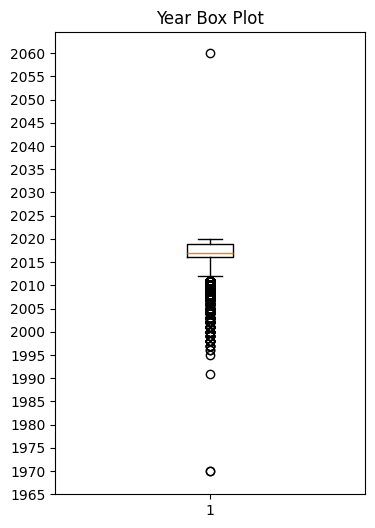

In [110]:
# 01. year
plt.figure(figsize=(4, 6))

plt.boxplot(full_data['year'])
plt.yticks(np.arange(1965, 2065, 5))
plt.title('Year Box Plot')

print(full_data['year'].median()) # 2017

14698.0


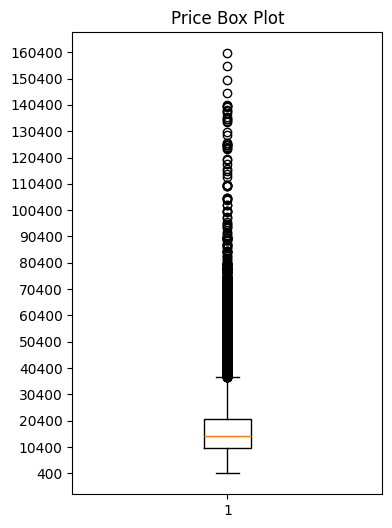

In [100]:
# 02. price
plt.figure(figsize=(4, 6))

plt.boxplot(full_data['price'])
plt.yticks(np.arange(400, 170400, 10000))
plt.title('Price Box Plot')

print(full_data['price'].median()) # 14698

17265.0


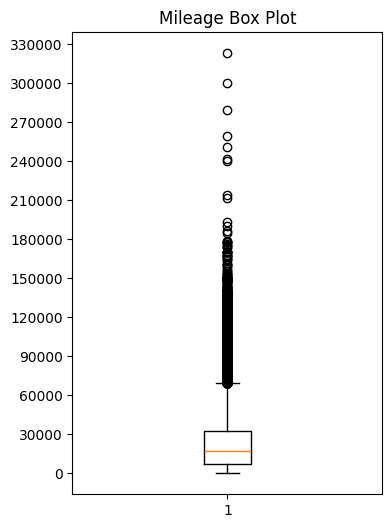

In [103]:
# 03. mileage
plt.figure(figsize=(4, 6))

plt.boxplot(full_data['mileage'])
plt.yticks(np.arange(0, 360000, 30000))
plt.title('Mileage Box Plot')

print(full_data['mileage'].median()) # 17625

145.0


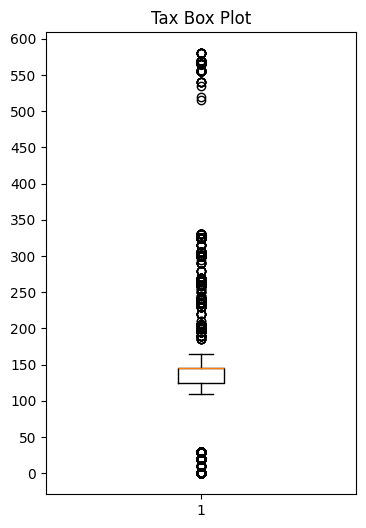

In [128]:
# 04. tax (1)
plt.figure(figsize=(4, 6))

plt.boxplot(full_data['tax'].dropna())
plt.yticks(np.arange(0, 650, 50))
plt.title('Tax Box Plot')

print(full_data['tax'].dropna().median()) # 145

145.0


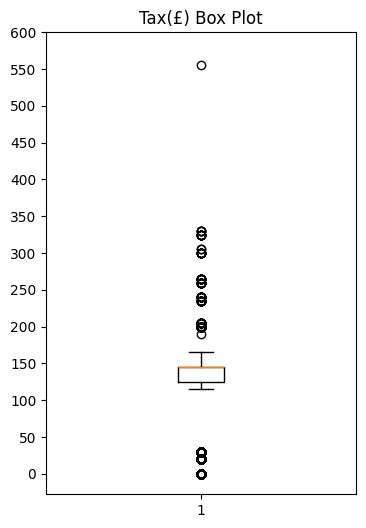

In [129]:
# 04. tax (2)
plt.figure(figsize=(4, 6))

plt.boxplot(full_data['tax(£)'].dropna())
plt.yticks(np.arange(0, 650, 50))
plt.title('Tax(£) Box Plot')

print(full_data['tax(£)'].dropna().median()) # 145

54.3


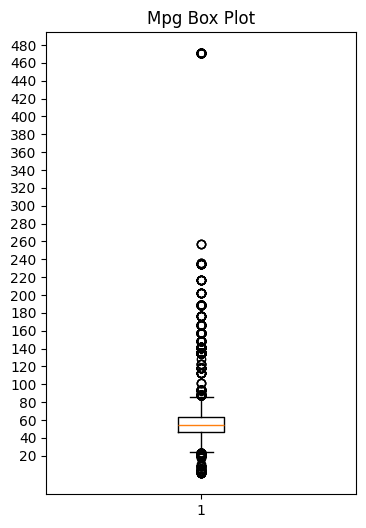

In [127]:
# 05. mpg
plt.figure(figsize=(4, 6))

plt.boxplot(full_data['mpg'].dropna())
plt.yticks(np.arange(20, 490, 20))
plt.title('Mpg Box Plot')

print(full_data['mpg'].dropna().median()) # 54.3

1.6


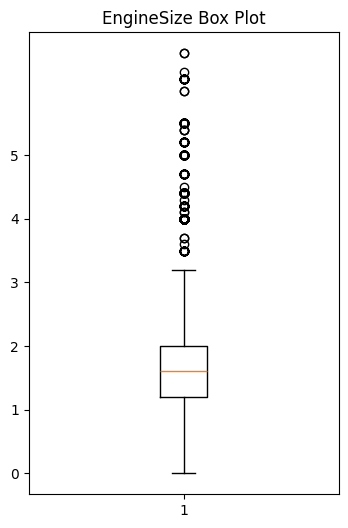

In [119]:
# 06. engineSize
plt.figure(figsize=(4, 6))

plt.boxplot(full_data['engineSize'])
plt.yticks(np.arange(0, 6, 1))
plt.title('EngineSize Box Plot')

print(full_data['engineSize'].median()) # 1.6

## cclass & focus 컬럼 vs. 파일 비교



In [130]:
# ▶ 경로 설정 (※강의자료가 위치에 있는 경로 확인)
import os
os.chdir('/content/drive/MyDrive/스파르타_COLAB/250124-250206 심화 프로젝트/used_car copy_original')
os.getcwd()

'/content/drive/MyDrive/스파르타_COLAB/250124-250206 심화 프로젝트/used_car copy_original'

In [145]:
full_data['model'].unique()

array([' Octavia', ' Citigo', ' Yeti Outdoor', ' Superb', ' Kodiaq',
       ' Rapid', ' Karoq', ' Fabia', ' Yeti', ' Scala', ' Roomster',
       ' Kamiq', ' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris',
       ' Aygo', ' C-HR', ' Prius', ' Avensis', ' Verso', ' Hilux',
       ' PROACE VERSO', ' Land Cruiser', ' Supra', ' Camry', ' Verso-S',
       ' IQ', ' Urban Cruiser', ' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5',
       ' A5', ' S4', ' Q2', ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8',
       ' Q8', ' RS4', ' RS5', ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5',
       ' A2', ' RS7', ' SLK', ' S Class', ' SL CLASS', ' G Class',
       ' GLE Class', ' GLA Class', ' A Class', ' B Class', ' GLC Class',
       ' C Class', ' E Class', ' GL Class', ' CLS Class', ' CLC Class',
       ' CLA Class', ' V Class', ' M Class', ' CL Class', ' GLS Class',
       ' GLB Class', ' X-CLASS', '180', ' CLK', ' R Class', '230', '220',
       '200', ' Corsa', ' Astra', ' Viva', ' Mokka', ' Mokka X',
       ' Cro

#### cclass 비교

In [142]:
cclass_df = pd.read_csv('cclass.csv')
cclass_df.head()

,model,year,price,transmission,mileage,fuelType,engineSize
0,C Class,2020,30495,Automatic,1200,Diesel,2.0
1,C Class,2020,29989,Automatic,1000,Petrol,1.5
2,C Class,2020,37899,Automatic,500,Diesel,2.0
3,C Class,2019,30399,Automatic,5000,Diesel,2.0
4,C Class,2019,29899,Automatic,4500,Diesel,2.0


In [143]:
cclass_df['model'].unique()

array([' C Class'], dtype=object)

In [144]:
cclass_df.info() #3899 개 데이터 / # 컬럼 tax, mpg, carmake, tax(£) 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3899 non-null   object 
 1   year          3899 non-null   int64  
 2   price         3899 non-null   int64  
 3   transmission  3899 non-null   object 
 4   mileage       3899 non-null   int64  
 5   fuelType      3899 non-null   object 
 6   engineSize    3899 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 213.4+ KB


In [150]:
cclass_df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
engineSize,0


In [141]:
cond1 = full_data['model']==' C Class'
cclass_full = full_data.loc[cond1]
cclass_full.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carMake,tax(£)
23689,C Class,2017,19890,Automatic,30281,Diesel,150.0,60.1,2.1,merc,NaN
23692,C Class,2014,15701,Automatic,20498,Diesel,20.0,64.2,2.1,merc,NaN
23693,C Class,2019,26601,Automatic,9949,Diesel,150.0,64.2,2.0,merc,NaN
23694,C Class,2016,17672,Automatic,31656,Diesel,30.0,64.2,2.1,merc,NaN
23702,C Class,2016,19328,Automatic,25042,Diesel,30.0,64.2,2.1,merc,NaN


In [147]:
cclass_full.info() #7646 개 데이터

<class 'pandas.core.frame.DataFrame'>
Index: 7646 entries, 23689 to 90574
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         7646 non-null   object 
 1   year          7646 non-null   int64  
 2   price         7646 non-null   int64  
 3   transmission  7646 non-null   object 
 4   mileage       7646 non-null   int64  
 5   fuelType      7646 non-null   object 
 6   tax           3747 non-null   float64
 7   mpg           3747 non-null   float64
 8   engineSize    7646 non-null   float64
 9   carMake       7646 non-null   object 
 10  tax(£)        0 non-null      float64
dtypes: float64(4), int64(3), object(4)
memory usage: 716.8+ KB


In [149]:
cclass_full.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,3899
mpg,3899
engineSize,0
carMake,0


In [151]:
cclass_full['carMake'].unique()

array(['merc', 'cclass'], dtype=object)

In [152]:
cond2 = cclass_full['carMake'] == 'cclass'
cclass_make = cclass_full.loc[cond2]
cclass_make.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3899 entries, 86676 to 90574
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3899 non-null   object 
 1   year          3899 non-null   int64  
 2   price         3899 non-null   int64  
 3   transmission  3899 non-null   object 
 4   mileage       3899 non-null   int64  
 5   fuelType      3899 non-null   object 
 6   tax           0 non-null      float64
 7   mpg           0 non-null      float64
 8   engineSize    3899 non-null   float64
 9   carMake       3899 non-null   object 
 10  tax(£)        0 non-null      float64
dtypes: float64(4), int64(3), object(4)
memory usage: 365.5+ KB


#### focus 비교

In [153]:
focus_df = pd.read_csv('focus.csv')
focus_df.head()

,model,year,price,transmission,mileage,fuelType,engineSize
0,Focus,2016,8000,Manual,38852,Petrol,1.0
1,Focus,2019,13400,Manual,11952,Petrol,1.0
2,Focus,2019,14600,Manual,22142,Petrol,1.5
3,Focus,2016,9450,Manual,14549,Diesel,1.6
4,Focus,2015,9999,Manual,7010,Diesel,1.6


In [155]:
focus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5454 entries, 0 to 5453
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         5454 non-null   object 
 1   year          5454 non-null   int64  
 2   price         5454 non-null   int64  
 3   transmission  5454 non-null   object 
 4   mileage       5454 non-null   int64  
 5   fuelType      5454 non-null   object 
 6   engineSize    5454 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 298.4+ KB


In [156]:
focus_df['model'].unique()

array([' Focus'], dtype=object)

In [157]:
focus_df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
engineSize,0


In [154]:
cond3 = full_data['model']==' Focus'
focus_full = full_data.loc[cond3]
focus_full.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carMake,tax(£)
81222,Focus,2016,8000,Manual,38852,Petrol,NaN,NaN,1.0,focus,NaN
81223,Focus,2019,13400,Manual,11952,Petrol,NaN,NaN,1.0,focus,NaN
81224,Focus,2019,14600,Manual,22142,Petrol,NaN,NaN,1.5,focus,NaN
81225,Focus,2016,9450,Manual,14549,Diesel,NaN,NaN,1.6,focus,NaN
81226,Focus,2015,9999,Manual,7010,Diesel,NaN,NaN,1.6,focus,NaN


In [158]:
focus_full['carMake'].unique()

array(['focus', 'ford'], dtype=object)

In [160]:
focus_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10042 entries, 81222 to 108538
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10042 non-null  object 
 1   year          10042 non-null  int64  
 2   price         10042 non-null  int64  
 3   transmission  10042 non-null  object 
 4   mileage       10042 non-null  int64  
 5   fuelType      10042 non-null  object 
 6   tax           4588 non-null   float64
 7   mpg           4588 non-null   float64
 8   engineSize    10042 non-null  float64
 9   carMake       10042 non-null  object 
 10  tax(£)        0 non-null      float64
dtypes: float64(4), int64(3), object(4)
memory usage: 941.4+ KB


In [161]:
focus_full.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,5454
mpg,5454
engineSize,0
carMake,0


In [162]:
cond4 = focus_full['carMake']=='focus'
focus_make = focus_full.loc[cond4]
focus_make.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5454 entries, 81222 to 86675
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         5454 non-null   object 
 1   year          5454 non-null   int64  
 2   price         5454 non-null   int64  
 3   transmission  5454 non-null   object 
 4   mileage       5454 non-null   int64  
 5   fuelType      5454 non-null   object 
 6   tax           0 non-null      float64
 7   mpg           0 non-null      float64
 8   engineSize    5454 non-null   float64
 9   carMake       5454 non-null   object 
 10  tax(£)        0 non-null      float64
dtypes: float64(4), int64(3), object(4)
memory usage: 511.3+ KB


In [163]:
full_data.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,14213
mpg,9353
engineSize,0
carMake,0


#### full2_data 와 비교하기

In [170]:
full2_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carMake,tax(£)
0,Octavia,2017,10550,Manual,25250,Petrol,150.0,54.3,1.4,skoda,NaN
1,Citigo,2018,8200,Manual,1264,Petrol,145.0,67.3,1.0,skoda,NaN
2,Octavia,2019,15650,Automatic,6825,Diesel,145.0,67.3,2.0,skoda,NaN
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165.0,51.4,2.0,skoda,NaN
4,Superb,2019,18350,Manual,10912,Petrol,150.0,40.9,1.5,skoda,NaN


- full2에서 cclass 추출

In [179]:
cond1_1 = full2_data['model'] == ' C Class'
cclass_full2 = full2_data.loc[cond1_1]
cclass_full2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3747 entries, 23689 to 36787
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3747 non-null   object 
 1   year          3747 non-null   int64  
 2   price         3747 non-null   int64  
 3   transmission  3747 non-null   object 
 4   mileage       3747 non-null   int64  
 5   fuelType      3747 non-null   object 
 6   tax           3747 non-null   float64
 7   mpg           3747 non-null   float64
 8   engineSize    3747 non-null   float64
 9   carMake       3747 non-null   object 
 10  tax(£)        0 non-null      float64
dtypes: float64(4), int64(3), object(4)
memory usage: 351.3+ KB


In [182]:
cclass_df_full = pd.merge(cclass_full2, cclass_df, on = ['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'engineSize'], how = "inner")
cclass_df_full.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carMake,tax(£)
0,C Class,2017,19890,Automatic,30281,Diesel,150.0,60.1,2.1,merc,NaN
1,C Class,2014,15701,Automatic,20498,Diesel,20.0,64.2,2.1,merc,NaN
2,C Class,2019,26601,Automatic,9949,Diesel,150.0,64.2,2.0,merc,NaN
3,C Class,2016,17672,Automatic,31656,Diesel,30.0,64.2,2.1,merc,NaN
4,C Class,2016,19328,Automatic,25042,Diesel,30.0,64.2,2.1,merc,NaN


In [183]:
cclass_df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3787 entries, 0 to 3786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3787 non-null   object 
 1   year          3787 non-null   int64  
 2   price         3787 non-null   int64  
 3   transmission  3787 non-null   object 
 4   mileage       3787 non-null   int64  
 5   fuelType      3787 non-null   object 
 6   tax           3787 non-null   float64
 7   mpg           3787 non-null   float64
 8   engineSize    3787 non-null   float64
 9   carMake       3787 non-null   object 
 10  tax(£)        0 non-null      float64
dtypes: float64(4), int64(3), object(4)
memory usage: 325.6+ KB


- full2 에서 focus 추출

In [171]:
cond3_1 = full2_data['model']==' Focus'
focus_full2 = full2_data.loc[cond3_1]
focus_full2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4588 entries, 81223 to 99185
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4588 non-null   object 
 1   year          4588 non-null   int64  
 2   price         4588 non-null   int64  
 3   transmission  4588 non-null   object 
 4   mileage       4588 non-null   int64  
 5   fuelType      4588 non-null   object 
 6   tax           4588 non-null   float64
 7   mpg           4588 non-null   float64
 8   engineSize    4588 non-null   float64
 9   carMake       4588 non-null   object 
 10  tax(£)        0 non-null      float64
dtypes: float64(4), int64(3), object(4)
memory usage: 430.1+ KB


In [184]:
focus_df_full = pd.merge(focus_full2, focus_df, on = ['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'engineSize'], how = "inner")
focus_df_full.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carMake,tax(£)
0,Focus,2018,14000,Manual,9083,Petrol,150.0,57.7,1.0,ford,NaN
1,Focus,2017,13000,Manual,12456,Petrol,150.0,57.7,1.0,ford,NaN
2,Focus,2017,13000,Manual,12456,Petrol,150.0,57.7,1.0,ford,NaN
3,Focus,2017,13000,Manual,12456,Petrol,150.0,57.7,1.0,ford,NaN
4,Focus,2017,13000,Manual,12456,Petrol,150.0,57.7,1.0,ford,NaN


In [185]:
focus_df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4754 non-null   object 
 1   year          4754 non-null   int64  
 2   price         4754 non-null   int64  
 3   transmission  4754 non-null   object 
 4   mileage       4754 non-null   int64  
 5   fuelType      4754 non-null   object 
 6   tax           4754 non-null   float64
 7   mpg           4754 non-null   float64
 8   engineSize    4754 non-null   float64
 9   carMake       4754 non-null   object 
 10  tax(£)        0 non-null      float64
dtypes: float64(4), int64(3), object(4)
memory usage: 408.7+ KB


## full2_data EDA

In [250]:
full2_data.info() #year, price, mileage, tax, mpg, engineSize, tax(E)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99187 non-null  object 
 1   year          99187 non-null  int64  
 2   price         99187 non-null  int64  
 3   transmission  99187 non-null  object 
 4   mileage       99187 non-null  int64  
 5   fuelType      99187 non-null  object 
 6   tax           94327 non-null  float64
 7   mpg           99187 non-null  float64
 8   engineSize    99187 non-null  float64
 9   carMake       99187 non-null  object 
 10  tax(£)        4860 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 8.3+ MB


### year 컬럼 전처리 의논

In [230]:
full2_data.groupby('year').count()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,carMake,tax(£)
year,,,,,,,,,,
1970,2,2,2,2,2,2,2,2,2,0
1996,2,2,2,2,2,2,2,2,2,0
1997,4,4,4,4,4,4,4,4,4,0
1998,8,8,8,8,8,8,8,8,8,0
1999,6,6,6,6,6,6,6,6,6,0
2000,9,9,9,9,9,8,9,9,9,1
2001,20,20,20,20,20,20,20,20,20,0
2002,31,31,31,31,31,30,31,31,31,1
2003,34,34,34,34,34,31,34,34,34,3


In [231]:
condition = full2_data['year']==1970
full2_data.loc[condition]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carMake,tax(£)
35745,M Class,1970,24999,Automatic,14000,Diesel,305.0,39.2,0.0,merc,NaN
47629,Zafira,1970,10495,Manual,37357,Petrol,200.0,42.2,1.4,vauxhall,NaN


In [232]:
condition2 = full_data['year']==1996
full2_data.loc[condition2]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carMake,tax(£)
80066,5 Series,1996,5995,Automatic,36000,Petrol,270.0,26.4,2.8,bmw,NaN


In [234]:
condition3 = full_data['carMake']=='merc'
full2_cond3 = full2_data.loc[condition3]
full2_cond3.describe() #max price = 159999 / median = 22480

,year,price,mileage,tax,mpg,engineSize,tax(£)
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,0.0
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530,NaN
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426,NaN
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000,NaN
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000,NaN
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000,NaN
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000,NaN
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000,NaN


- year 별 price 평균값 비교

In [193]:
full2_year_price = full2_data.groupby('year')['price'].mean()
full2_yp = pd.DataFrame(full2_year_price)
full2_yp.reset_index(drop = False, inplace=True)
full2_yp.head()

,year,price
0,1970,17747.000000
1,1996,4497.500000
2,1997,4886.250000
3,1998,8257.250000
4,1999,3521.666667


In [198]:
full2_yp.describe()

,year,price
count,27.000000,27.000000
mean,2008.518519,8480.974365
std,14.465796,6599.657312
min,1970.000000,3017.420290
25%,2001.500000,3852.989012
50%,2008.000000,5286.147059
75%,2014.500000,10803.610260
max,2060.000000,28392.529451


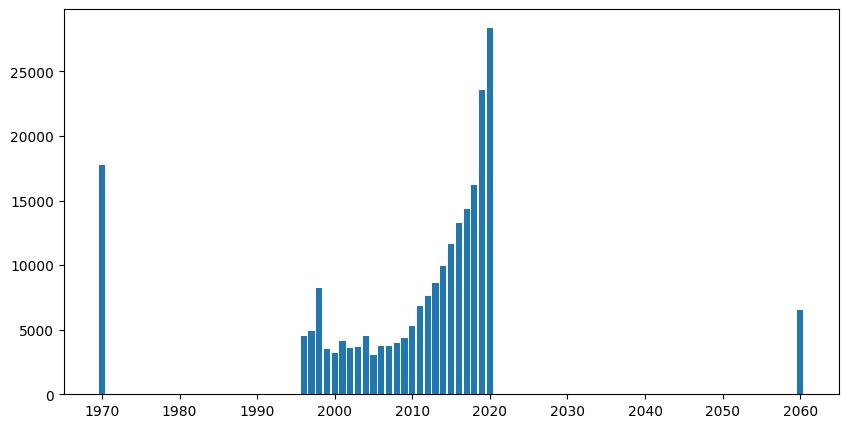

In [227]:
fig = plt.figure(figsize=(10, 5))

plt.bar(full2_yp['year'], full2_yp['price'])
plt.xticks(range(1970, 2070, 10))
plt.show()

In [238]:
full2_year_price2 = full2_data.groupby('year')['price'].sum()
full2_yp2 = pd.DataFrame(full2_year_price2)
full2_yp2.reset_index(drop = False, inplace=True)
full2_yp2.head()

,year,price
0,1970,35494
1,1996,8995
2,1997,19545
3,1998,66058
4,1999,21130


In [241]:
full2_yp2.describe()

,year,price
count,27.000000,2.700000e+01
mean,2008.518519,6.173600e+07
std,14.465796,1.401961e+08
min,1970.000000,6.495000e+03
25%,2001.500000,7.452400e+04
50%,2008.000000,6.041490e+05
75%,2014.500000,3.151903e+07
max,2060.000000,6.298107e+08


In [245]:
condition4 = (full2_yp2['year']>=2000) & (full2_yp2['year']<2060)
full2_yp3 = full2_yp2.loc[condition4]

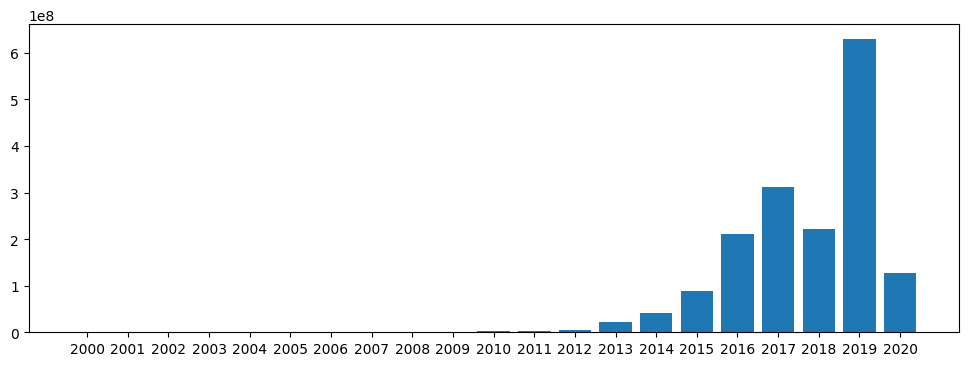

In [249]:
fig = plt.figure(figsize=(12, 4))

plt.bar(full2_yp3['year'], full2_yp3['price'])
plt.xticks(range(2000, 2021, 1))
plt.show()

### mileage 컬럼

In [252]:
full2_data['mileage'].describe()

,mileage
count,99187.000000
mean,23058.914213
std,21148.523721
min,1.000000
25%,7425.000000
50%,17460.000000
75%,32339.000000
max,323000.000000


In [255]:
full2_data['mileage'].isnull().sum()

0

Text(0.5, 1.0, 'Mileage Box Plot')

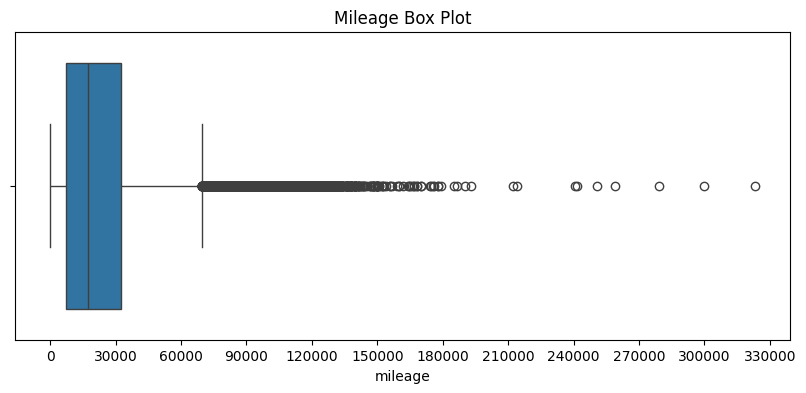

In [266]:
plt.figure(figsize=(10, 4))

sns.boxplot(x="mileage", data=full2_data)
plt.xticks(np.arange(0, 340000, 30000))
plt.title('Mileage Box Plot')

In [ ]:
full2_data['mileage_cut'] = pd.cut(full2_data.mileage, bins=[0, 30000, 60000, 90000, 120000, 150000, 180000, 210000, 240000, 270000 300000])